# Import Package

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Import Data

In [219]:
df = pd.read_csv("data/data.csv", delimiter=';')
df.sample(5)

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius
7096,05/02/2018,Jakarta Pusat,Dini Hari,Berawan,75 - 100,23 - 31
10424,03/07/2018,Kepulauan Seribu,Dini Hari,Cerah Berawan,55 - 90,22 - 33
838,18/02/2017,Jakarta Selatan,Pagi,Hujan Sedang,80 - 95,24 - 31
12930,19/10/2018,Jakarta Pusat,Pagi,Cerah Berawan,55 - 90,24 - 34
9907,11/06/2018,Jakarta Pusat,Siang,Cerah Berawan,55 - 90,23 - 32


Mengambil dataset prakiraan cuaca Provinsi DKI Jakarta tahun 2017 dari website <br>
https://data.jakarta.go.id/dataset/data-prakiraan-cuaca-wilayah-provinsi-dki-jakarta-tahun-2017
<br><br>Mengambil dataset prakiraan cuaca Provinsi DKI Jakarta tahun 2018 dari website <br> https://katalog.data.go.id/dataset/data-prakiraan-cuaca-wilayah-provinsi-dki-jakarta-tahun-2018

# Preprocessing

### Melihat Jumlah Baris dan Kolom

In [220]:
df.shape

(14676, 6)

Dataset terdiri dari 8535 baris dan 6 kolom

### Melihat Missing Value

In [221]:
df.isnull().sum()

tanggal                 0
wilayah                 0
waktu                   0
cuaca                   0
kelembaban_persen       0
suhu_derajat_celcius    0
dtype: int64

Membuang data yang kosong atau null

#### Melihat Kembali Jumlah Baris dan Kolom

In [222]:
df.shape

(14676, 6)

Jumlah baris menjadi 14676 dan kolom 6

### Informasi setiap Kolom

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14676 entries, 0 to 14675
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tanggal               14676 non-null  object
 1   wilayah               14676 non-null  object
 2   waktu                 14676 non-null  object
 3   cuaca                 14676 non-null  object
 4   kelembaban_persen     14676 non-null  object
 5   suhu_derajat_celcius  14676 non-null  object
dtypes: object(6)
memory usage: 688.1+ KB


In [224]:
df['waktu'].value_counts()

Malam        3354
Pagi         3354
Siang        3354
Dini Hari    3246
dini hari     342
malam         342
pagi          342
siang         342
Name: waktu, dtype: int64

In [225]:
df['wilayah'].value_counts()

Jakarta Barat       2446
Jakarta Pusat       2446
Jakarta Selatan     2446
Jakarta Timur       2446
Jakarta Utara       2446
Kepulauan Seribu    2446
Name: wilayah, dtype: int64

In [226]:
df['cuaca'].value_counts()

Cerah Berawan     5111
Berawan           4037
Hujan Lokal       1919
Hujan Ringan      1177
Berawan Tebal      893
Cerah              610
Hujan Sedang       423
Hujan Petir        347
Cerah Berawan       61
Cerah               26
Berawan             22
Hujan Lokal         13
Udara Kabur          9
Hujan Ringan         4
Berawan Tebal        3
 Berawan             3
Cerah Berawah        2
Cerah berawan        2
Hujan Ringanl        1
Beawan               1
Cerang Berawan       1
Cerah                1
Hujan Petir          1
Hujan Sedang         1
Berawan Teba         1
Berawa               1
Hujang Sedang        1
Hujan Loka           1
Hujan RIngan         1
Berawan Sedang       1
Berawan tebal        1
Cerah Berawn         1
Name: cuaca, dtype: int64

## Data Cleaning

### Menggunakan Mapping untuk mengelompokkan jenis Cuaca

<AxesSubplot:xlabel='jenis_cuaca', ylabel='count'>

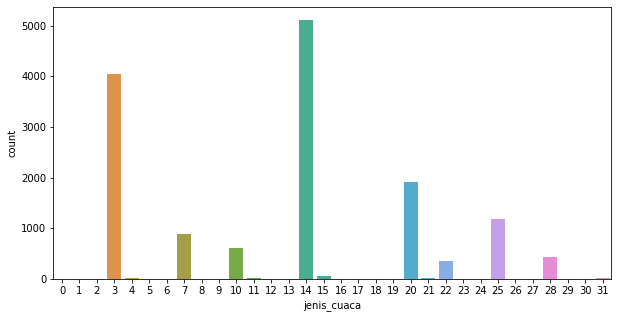

In [227]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
cuaca_kategorik = df.copy()
cuaca_kategorik['jenis_cuaca'] = LE.fit_transform(cuaca_kategorik['cuaca'])
ax, fig = plt.subplots(figsize=(10, 5))
sns.countplot(x='jenis_cuaca', data=cuaca_kategorik)

Visualisasi jenis cuaca

In [228]:
df["cuaca"].unique()

array(['Hujan Ringan', 'Hujan Petir', 'Berawan', 'Hujan Sedang',
       'Berawan Tebal', 'Hujan Lokal', 'Cerah Berawan', 'Berawan Tebal ',
       'Berawan tebal', 'Berawan Sedang', 'Udara Kabur', 'Cerah',
       'Berawan ', 'Cerah Berawan ', 'Cerah ', 'Hujan Ringan ',
       'Berawan Teba', 'Hujan RIngan', ' Berawan', 'Hujan Lokal ',
       'Hujan Loka', 'Hujang Sedang', 'Cerah berawan', 'Berawa',
       'Hujan Ringanl', 'Hujan Sedang ', 'Hujan Petir ', 'Cerah  ',
       'Cerah Berawah', 'Beawan', 'Cerang Berawan', 'Cerah Berawn'],
      dtype=object)

Terdapat 27 jenis cuaca sehingga akan dikelompokkan jenis cuaca menjadi 3 yaitu Hujan, Cerah dan Berawan

In [229]:
kategori_cuaca = pd.DataFrame()
kategori_cuaca['cuaca'] = df['cuaca'].value_counts()
kategori_cuaca[['cuaca']]

,cuaca
Cerah Berawan,5111
Berawan,4037
Hujan Lokal,1919
Hujan Ringan,1177
Berawan Tebal,893
Cerah,610
Hujan Sedang,423
Hujan Petir,347
Cerah Berawan,61
Cerah,26


#### Mapping Cuaca

In [230]:
cuaca_map = {
    'Hujan Ringan': 'Hujan Ringan',
    'Hujan Petir': 'Hujan Petir',
    'Berawan': 'Berawan',
    'Hujan Sedang': 'Hujan Sedang',
    'Berawan Tebal': 'Berawan Tebal',
    'Hujan Lokal': 'Hujan Lokal',
    'Cerah Berawan': 'Cerah Berawan',
    'Berawan Tebal ': 'Berawan Tebal',
    'Berawan tebal': 'Berawan Tebal',
    'Berawan Sedang': 'Berawan',
    'Cerah': 'Cerah',
    'Berawan ': 'Berawan',
    'Cerah Berawan ': 'Cerah Berawan',
    'Cerah ': 'Cerah',
    'Hujan': 'Hujan Lokal',
    'Hujan Ringan ': 'Hujan Ringan',
    'Berawan Teba': 'Berawan Tebal',
    'Hujan RIngan': 'Hujan Ringan',
    ' Berawan': 'Berawan',
    'Hujan Lokal ': 'Hujan Lokal',
    'Hujan Loka': 'Hujan Lokal',
    'Hujang Sedang': 'Hujan Sedang',
    'Cerah berawan': 'Cerah Berawan',
    'Berawa': 'Berawan',
    'Hujan Ringanl': 'Hujan Ringan',
    'Hujan Sedang ': 'Hujan Sedang',
    'Hujan Petir ': 'Hujan Petir',
    'Cerah  ': 'Cerah',
    'Cerah Berawah': 'Cerah Berawan',
    'Beawan': 'Berawan',
    'Cerang Berawan': 'Cerah Berawan',
    'Cerah Berawn': 'Cerah Berawan'
}

df['cuaca'] = df['cuaca'].map(cuaca_map)
df.dropna(inplace=True)

In [231]:
kategori_cuaca = pd.DataFrame()
kategori_cuaca['cuaca'] = df['cuaca'].value_counts()
kategori_cuaca[['cuaca']]

,cuaca
Cerah Berawan,5178
Berawan,4065
Hujan Lokal,1933
Hujan Ringan,1183
Berawan Tebal,898
Cerah,637
Hujan Sedang,425
Hujan Petir,348


Terdapat 8 jenis kategori cuaca

<AxesSubplot:xlabel='cuaca', ylabel='count'>

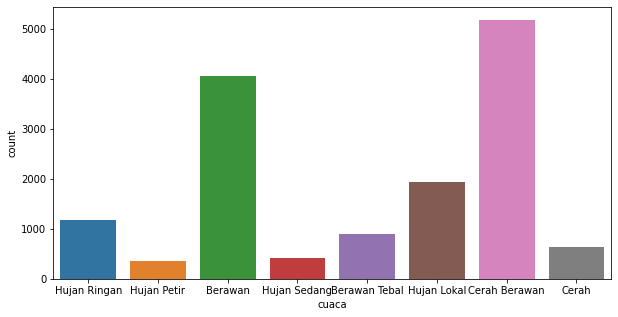

In [232]:
ax, fig = plt.subplots(figsize=(10, 5))
sns.countplot(x='cuaca', data=df)

### Menggunakan Regular Expression untuk mengelompokkan jenis Waktu

<AxesSubplot:xlabel='waktu', ylabel='count'>

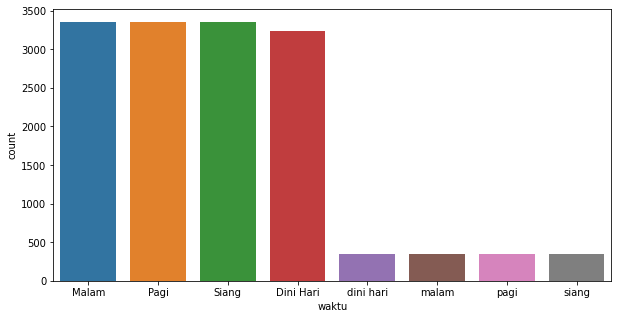

In [233]:
ax, fig = plt.subplots(figsize=(10, 5))
sns.countplot(x='waktu', data=df)

Visualisasi jenis waktu

In [234]:
kategori_waktu = pd.DataFrame()
kategori_waktu['waktu'] = df['waktu'].value_counts()
kategori_waktu[['waktu']]

,waktu
Pagi,3354
Siang,3354
Malam,3349
Dini Hari,3242
dini hari,342
malam,342
pagi,342
siang,342


Terdapat 8 jenis waktu pengambilan data cuaca sehingga akan dikelompokkan menjadi 4 waktu saja yaitu Siang, Pagi, Malam, dan Dini Hari

In [235]:
import re

def cuaca(x):
  if (re.findall("dini hari", x)):
    return 'Dini Hari'
  elif (re.findall("siang", x)):
    return 'Siang'
  elif (re.findall("pagi", x)):
    return 'Pagi'
  elif (re.findall("malam", x)):
    return 'Malam'
  else:
    return x

df["waktu"] = df['waktu'].apply(cuaca)
df["waktu"].value_counts()

Pagi         3696
Siang        3696
Malam        3691
Dini Hari    3584
Name: waktu, dtype: int64

Waktu Siang terdapat 2100 data<br>
Waktu Pagi terdapat 2100 data<br>
Waktu Malam terdapat 2100 data<br>
Waktu Dini Hari terdapat 2100 data<br>

<AxesSubplot:xlabel='waktu', ylabel='count'>

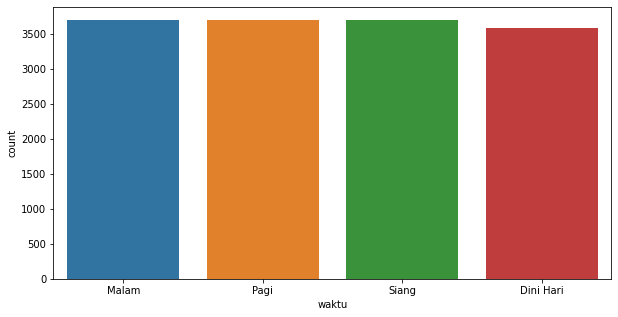

In [236]:
ax, fig = plt.subplots(figsize=(10, 5))
sns.countplot(x='waktu', data=df)

## Feature Engineering

### kolom kelembaban_persen

#### Split Data Kelembaban menjadi Kelembaban Minimal dan Maximal

In [237]:
df["kelembaban_min"] = df['kelembaban_persen'].apply(lambda x: x.split("-")[0])
df["kelembaban_min"] = [x.strip(' ') for x in df["kelembaban_min"]]

df["kelembaban_max"] = df['kelembaban_persen'].apply(lambda x: x.split("-")[1])
df["kelembaban_max"] = [x.strip(' ') for x in df["kelembaban_max"]]

df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,kelembaban_min,kelembaban_max
0,03/01/2017,Jakarta Barat,Malam,Hujan Ringan,65 - 95,22 - 31,65,95
1,03/01/2017,Jakarta Barat,Pagi,Hujan Ringan,65 - 95,22 - 31,65,95
2,03/01/2017,Jakarta Barat,Siang,Hujan Petir,65 - 95,22 - 31,65,95
3,03/01/2017,Jakarta Pusat,Malam,Hujan Ringan,65 - 95,22 - 31,65,95
4,03/01/2017,Jakarta Pusat,Pagi,Hujan Ringan,65 - 95,22 - 31,65,95


Membuat kolom kelembaban_min dengan mengambil nilai terkecil dari kolom kelembaban_persen<br>
Membuat kolom kelembaban_max dengan mengambil nilai terbesar dari kolom kelembaban_persen<br>
<br>
Dengan split data pada kolom kelembaban_persen agar terbagi menjadi 2 bagian untuk bagian kiri untuk nilai minimal dan bagian kanan untuk nilai maksimal

#### Membuat kolom kelembaban_mean

In [238]:
df['kelembaban_mean'] = (df['kelembaban_min'].astype(int) + df['kelembaban_max'].astype(int)) / 2

df.drop(columns=['kelembaban_persen'], inplace=True)

Membuat kolom kelembaban_mean untuk menampung nilai rata-rata pada interval minimal dan maksimal,<br>
Lalu membuang kolom kelembaban_persen<br>
Karena informasi pada kolom tersebut sudah diwakili oleh kolom baru yang dibuat

#### Melihat Masing Masing Data dari Kelembaban Minimal, Maksimal dan Rata-Rata

In [239]:
print('Kelembaban Min')
print(df['kelembaban_min'].value_counts(), '\n')

print('Kelembaban Max')
print(df['kelembaban_max'].value_counts(), '\n')

print('Kelembaban Mean')
print(df['kelembaban_mean'].value_counts())

Kelembaban Min
60    2778
65    2645
70    2418
55    2411
75    1355
80     906
50     744
45     696
85     306
40     240
35      96
90      48
95      24
Name: kelembaban_min, dtype: int64 

Kelembaban Max
95     5836
90     3986
85     2112
100    1539
80      912
75      216
70       24
92       24
97       18
Name: kelembaban_max, dtype: int64 

Kelembaban Mean
80.0    2241
77.5    1830
82.5    1692
75.0    1681
72.5    1392
85.0    1296
70.0    1080
87.5     971
67.5     792
90.0     432
62.5     432
65.0     432
92.5     138
55.0      72
57.5      72
60.0      48
95.0      24
71.0      24
81.0      18
Name: kelembaban_mean, dtype: int64


### kolom suhu_derajat_celcius

#### Split Data Suhu menjadi Suhu Minimal dan Maximal

In [240]:
df["suhu_min"] = df.suhu_derajat_celcius.apply(lambda x: x.split("-")[0])
df["suhu_min"] = [x.strip(' ') for x in df["suhu_min"]]

df["suhu_max"] = df.suhu_derajat_celcius.apply(lambda x: x.split("-")[1])
df["suhu_max"] = [x.strip(' ') for x in df["suhu_max"]]

df.head()

,tanggal,wilayah,waktu,cuaca,suhu_derajat_celcius,kelembaban_min,kelembaban_max,kelembaban_mean,suhu_min,suhu_max
0,03/01/2017,Jakarta Barat,Malam,Hujan Ringan,22 - 31,65,95,80.0,22,31
1,03/01/2017,Jakarta Barat,Pagi,Hujan Ringan,22 - 31,65,95,80.0,22,31
2,03/01/2017,Jakarta Barat,Siang,Hujan Petir,22 - 31,65,95,80.0,22,31
3,03/01/2017,Jakarta Pusat,Malam,Hujan Ringan,22 - 31,65,95,80.0,22,31
4,03/01/2017,Jakarta Pusat,Pagi,Hujan Ringan,22 - 31,65,95,80.0,22,31


Membuat kolom suhu_min dengan mengambil nilai terkecil dari kolom suhu_derajat_celcius<br>
Membuat kolom suhu_max dengan mengambil nilai terbesar dari kolom suhu_derajat_celcius<br>
<br>
Dengan split data pada kolom suhu_derajat_celcius agar terbagi menjadi 2 bagian untuk bagian kiri untuk nilai minimal dan bagian kanan untuk nilai maksimal

#### Membuat kolom suhu_mean

In [241]:
df['suhu_mean'] = (df['suhu_min'].astype(int) + df['suhu_max'].astype(int)) / 2

df.drop(columns=['suhu_derajat_celcius'], inplace=True)

Membuat kolom suhu_mean untuk menampung nilai rata-rata pada interval minimal dan maksimal,<br>
Lalu membuang kolom suhu_derajat_celcius<br>
Karena informasi pada kolom tersebut sudah diwakili oleh kolom baru yang dibuat

#### Melihat Masing Masing Data dari Suhu Minimal, Maksimal dan Rata-Rata

In [242]:
print('Suhu Min')
print(df['suhu_min'].value_counts(), '\n')

print('Suhu Max')
print(df['suhu_max'].value_counts(), '\n')

print('Suhu Mean')
print(df['suhu_mean'].value_counts())

Suhu Min
24    7221
23    3888
25    2184
22     870
26     288
21     144
27      48
20      24
Name: suhu_min, dtype: int64 

Suhu Max
33    6034
32    4200
34    1908
31    1380
30     570
35     288
29     191
28      96
Name: suhu_max, dtype: int64 

Suhu Mean
28.0    3924
28.5    3808
29.0    2226
27.5    2208
27.0    1302
29.5     528
26.5     341
30.0     168
26.0     114
25.5      48
Name: suhu_mean, dtype: int64


In [243]:
df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_min,kelembaban_max,kelembaban_mean,suhu_min,suhu_max,suhu_mean
0,03/01/2017,Jakarta Barat,Malam,Hujan Ringan,65,95,80.0,22,31,26.5
1,03/01/2017,Jakarta Barat,Pagi,Hujan Ringan,65,95,80.0,22,31,26.5
2,03/01/2017,Jakarta Barat,Siang,Hujan Petir,65,95,80.0,22,31,26.5
3,03/01/2017,Jakarta Pusat,Malam,Hujan Ringan,65,95,80.0,22,31,26.5
4,03/01/2017,Jakarta Pusat,Pagi,Hujan Ringan,65,95,80.0,22,31,26.5


## Preprocessing

#### Melihat Tipe Data setiap Kolom

In [244]:
df.dtypes

tanggal             object
wilayah             object
waktu               object
cuaca               object
kelembaban_min      object
kelembaban_max      object
kelembaban_mean    float64
suhu_min            object
suhu_max            object
suhu_mean          float64
dtype: object

Memperbaiki jenis tipe data sesuai dengan isi dari data pada kolom tersebut

#### Mengubah data yang tidak sesuai

In [245]:
updated = (df['tanggal'] == '2018-11-31')
updated

0        False
1        False
2        False
3        False
4        False
         ...  
14671    False
14672    False
14673    False
14674    False
14675    False
Name: tanggal, Length: 14667, dtype: bool

In [246]:
df.loc[updated, ['tanggal']] = '2018-12-01'
df[df['tanggal'] == '2018-12-01']

,tanggal,wilayah,waktu,cuaca,kelembaban_min,kelembaban_max,kelembaban_mean,suhu_min,suhu_max,suhu_mean


Mengubah tipe data tanggal yang tidak sesuai

In [247]:
df.dtypes

tanggal             object
wilayah             object
waktu               object
cuaca               object
kelembaban_min      object
kelembaban_max      object
kelembaban_mean    float64
suhu_min            object
suhu_max            object
suhu_mean          float64
dtype: object

In [248]:
df["kelembaban_min"] = df.kelembaban_min.astype(int)
df["kelembaban_max"] = df.kelembaban_max.astype(int)
df["suhu_min"] = df.suhu_min.astype(int)
df["suhu_max"] = df.suhu_max.astype(int)
df["tanggal"] = pd.to_datetime(df['tanggal'])
df.dtypes

C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/2259280088.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["tanggal"] = pd.to_datetime(df['tanggal'])


tanggal            datetime64[ns]
wilayah                    object
waktu                      object
cuaca                      object
kelembaban_min              int32
kelembaban_max              int32
kelembaban_mean           float64
suhu_min                    int32
suhu_max                    int32
suhu_mean                 float64
dtype: object

Mengubah kolom kelembaban_min, kelembaban_max, suhu_min, dan suhu_max menjadi integer<br>
Karena data pada kolom tersebut bersifat numerikal<br>
Mengubah kolom tanggal menjadi datetime karena berisi tanggal pengambilan data

### Informasi Data

#### Melihat informasi mengenai kolom

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14667 entries, 0 to 14675
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tanggal          14667 non-null  datetime64[ns]
 1   wilayah          14667 non-null  object        
 2   waktu            14667 non-null  object        
 3   cuaca            14667 non-null  object        
 4   kelembaban_min   14667 non-null  int32         
 5   kelembaban_max   14667 non-null  int32         
 6   kelembaban_mean  14667 non-null  float64       
 7   suhu_min         14667 non-null  int32         
 8   suhu_max         14667 non-null  int32         
 9   suhu_mean        14667 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(4), object(3)
memory usage: 1.0+ MB


In [250]:
df.sample(5)

,tanggal,wilayah,waktu,cuaca,kelembaban_min,kelembaban_max,kelembaban_mean,suhu_min,suhu_max,suhu_mean
10429,2018-04-07,Jakarta Barat,Malam,Cerah Berawan,55,90,72.5,22,33,27.5
7254,2018-11-02,Jakarta Utara,Pagi,Hujan Lokal,70,95,82.5,23,31,27.0
4776,2017-08-30,Jakarta Timur,Dini Hari,Cerah Berawan,55,90,72.5,24,33,28.5
11729,2018-08-28,Jakarta Pusat,Malam,Berawan,65,85,75.0,25,34,29.5
13483,2018-12-11,Jakarta Pusat,Siang,Cerah Berawan,50,90,70.0,23,35,29.0


In [251]:
df['cuaca'].value_counts()

Cerah Berawan    5178
Berawan          4065
Hujan Lokal      1933
Hujan Ringan     1183
Berawan Tebal     898
Cerah             637
Hujan Sedang      425
Hujan Petir       348
Name: cuaca, dtype: int64

Data termasuk tidak balanced<br>
Sehingga kedepannya akan dilakukan proses oversampling dan undersampling

In [252]:
tanggal_awal = df['tanggal'].dt.date.min()
tanggal_akhir = df['tanggal'].dt.date.max()

print('Tanggal Awal', tanggal_awal, '\nTanggal Akhir', tanggal_akhir)

Tanggal Awal 2017-01-02 
Tanggal Akhir 2018-12-31


Melihat tanggal awal pengambilan data hingga akhir pengambilan data

In [253]:
import calendar

df_tanggal = pd.DataFrame()
df_tanggal['bulan'] = df['tanggal'].dt.month
df_tanggal['bulan'] = df_tanggal['bulan'].apply(lambda x: calendar.month_name[x])

df_tanggal['tanggal'] = df['tanggal'].dt.day
grouped = df_tanggal.groupby('bulan')['tanggal'].nunique()
grouped

bulan
April        30
August       31
December     31
February     28
January      27
July         31
June         30
March        31
May          31
November     30
October      30
September    30
Name: tanggal, dtype: int64

In [254]:
import numpy as np

In [255]:
date_min = df['tanggal'].dt.date.min()
date_max = df['tanggal'].dt.date.max()

df = df.set_index('tanggal')
tanggal_hilang = pd.date_range(start=str(date_min), end=str(date_max)).difference(df.index)
print(f"Tanggal yang Hilang\n{tanggal_hilang}")
df = df.reset_index()


Tanggal yang Hilang
DatetimeIndex(['2017-01-04', '2017-01-07', '2017-01-11', '2017-01-12',
               '2017-01-18', '2017-01-21', '2017-02-01', '2017-02-11',
               '2017-02-12', '2017-02-16',
               ...
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-02-02',
               '2018-02-27', '2018-02-28', '2018-03-30', '2018-03-31',
               '2018-05-31', '2018-10-11'],
              dtype='datetime64[ns]', length=115, freq=None)


Melihat apakah data setiap hari sudah lengkap atau belum<br>
Berdasarkan analisis didapatkan bahwa data tidak terupdate setiap hari pada setiap bulannya

#### Membagi data antara kolom numerikal dengan kategorikal

In [256]:
numeric = ['kelembaban_min', 'kelembaban_max', 'suhu_min', 'suhu_max', 'kelembaban_mean', 'suhu_mean']
categoric = ['cuaca', 'waktu', 'wilayah']

#### Statistik kolom numerik

In [257]:
df[numeric].describe()

,kelembaban_min,kelembaban_max,suhu_min,suhu_max,kelembaban_mean,suhu_mean
count,14667.000000,14667.000000,14667.000000,14667.000000,14667.000000,14667.000000
mean,63.316629,91.455240,23.778278,32.493421,77.385934,28.135849
std,10.197115,5.672534,0.908127,1.156101,7.213580,0.745209
min,35.000000,70.000000,20.000000,28.000000,55.000000,25.500000
25%,55.000000,90.000000,23.000000,32.000000,72.500000,27.500000
50%,65.000000,95.000000,24.000000,33.000000,77.500000,28.000000
75%,70.000000,95.000000,24.000000,33.000000,82.500000,28.500000
max,95.000000,100.000000,27.000000,35.000000,95.000000,30.000000


Persebaran nilai pada data kelembaban_min, kelembaban_max, suhu_min, suhu_max, kelembaban_mean dan suhu_mean sudah bagus<br>
Persebaran data yang simetrik distribusinya dilihat dari nilai mean dan median yang tidak berbeda jauh<br>
sehingga tidak perlu dilakukan normalisasi

#### Statistik kolom kategorik

In [258]:
df[categoric].describe()

,cuaca,waktu,wilayah
count,14667,14667,14667
unique,8,4,6
top,Cerah Berawan,Pagi,Kepulauan Seribu
freq,5178,3696,2446


Kolom cuaca, waktu, dan wilayah masih bersifat object / string maka selanjutnya akan dilakukan encode pada data kolom tersebut

#### Melihat duplikasi data

In [259]:
df.duplicated().sum()

0

Tidak terdapat data yg duplikat

## Encoding

#### Mengubah kolom kategorik menggunakan one-hot encoding

In [260]:
df.dtypes

tanggal            datetime64[ns]
wilayah                    object
waktu                      object
cuaca                      object
kelembaban_min              int32
kelembaban_max              int32
kelembaban_mean           float64
suhu_min                    int32
suhu_max                    int32
suhu_mean                 float64
dtype: object

In [261]:
df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_min,kelembaban_max,kelembaban_mean,suhu_min,suhu_max,suhu_mean
0,2017-03-01,Jakarta Barat,Malam,Hujan Ringan,65,95,80.0,22,31,26.5
1,2017-03-01,Jakarta Barat,Pagi,Hujan Ringan,65,95,80.0,22,31,26.5
2,2017-03-01,Jakarta Barat,Siang,Hujan Petir,65,95,80.0,22,31,26.5
3,2017-03-01,Jakarta Pusat,Malam,Hujan Ringan,65,95,80.0,22,31,26.5
4,2017-03-01,Jakarta Pusat,Pagi,Hujan Ringan,65,95,80.0,22,31,26.5


In [262]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

df_encode = df.copy()

kategorik = df.select_dtypes(include=['object']).drop('cuaca', axis=1).columns
numerik = df.select_dtypes(exclude=['object']).columns

transformer = ColumnTransformer([
    ('categoric', OneHotEncoder(dtype=int), kategorik),
    ('label', 'passthrough', ['cuaca']),
    ('numeric', 'passthrough', numerik),
])

encode_data = transformer.fit_transform(df_encode)
encode_kategorik = transformer.named_transformers_['categoric'].get_feature_names_out(kategorik)
encode_kolom = list(encode_kategorik) + ['cuaca'] + list(numerik)

df_encode = pd.DataFrame(encode_data, columns=encode_kolom)
df_encode.head()

,wilayah_Jakarta Barat,wilayah_Jakarta Pusat,wilayah_Jakarta Selatan,wilayah_Jakarta Timur,wilayah_Jakarta Utara,wilayah_Kepulauan Seribu,waktu_Dini Hari,waktu_Malam,waktu_Pagi,waktu_Siang,cuaca,tanggal,kelembaban_min,kelembaban_max,kelembaban_mean,suhu_min,suhu_max,suhu_mean
0,1,0,0,0,0,0,0,1,0,0,Hujan Ringan,2017-03-01,65,95,80.0,22,31,26.5
1,1,0,0,0,0,0,0,0,1,0,Hujan Ringan,2017-03-01,65,95,80.0,22,31,26.5
2,1,0,0,0,0,0,0,0,0,1,Hujan Petir,2017-03-01,65,95,80.0,22,31,26.5
3,0,1,0,0,0,0,0,1,0,0,Hujan Ringan,2017-03-01,65,95,80.0,22,31,26.5
4,0,1,0,0,0,0,0,0,1,0,Hujan Ringan,2017-03-01,65,95,80.0,22,31,26.5


<b>Ilustrasi hasil dari tahapan Encoding menggunakan One-Hot Encoding dengan Columns Transformer

Mengubah kolom kategorik menjadi bentuk numerik,<br>
Kolom label atau cuaca tidak diubah karena merupakan target klasifikasi<br>
Kolom numerik di 'passthrough' karena tidak dilakukan scaling/normalisasi<br>
Penggunaan 'passthrough' dilakukan agar menjaga kolom-kolom yang tidak memerlukan transformasi tetap ada dalam output

In [263]:
kolom1 = df_encode.columns[df_encode.columns.str.contains('waktu|wilayah', case=False)]
df_encode[kolom1] = df_encode[kolom1].astype(int)

kolom2 = df_encode.columns[df_encode.columns.str.contains('mean', case=False)]
df_encode[kolom2] = df_encode[kolom2].astype(float)

kolom3 = df_encode.columns[df_encode.columns.str.contains('min|max', case=False)]
df_encode[kolom3] = df_encode[kolom3].astype(int)

df_encode.dtypes

wilayah_Jakarta Barat                int32
wilayah_Jakarta Pusat                int32
wilayah_Jakarta Selatan              int32
wilayah_Jakarta Timur                int32
wilayah_Jakarta Utara                int32
wilayah_Kepulauan Seribu             int32
waktu_Dini Hari                      int32
waktu_Malam                          int32
waktu_Pagi                           int32
waktu_Siang                          int32
cuaca                               object
tanggal                     datetime64[ns]
kelembaban_min                       int32
kelembaban_max                       int32
kelembaban_mean                    float64
suhu_min                             int32
suhu_max                             int32
suhu_mean                          float64
dtype: object

# Visualisasi Data

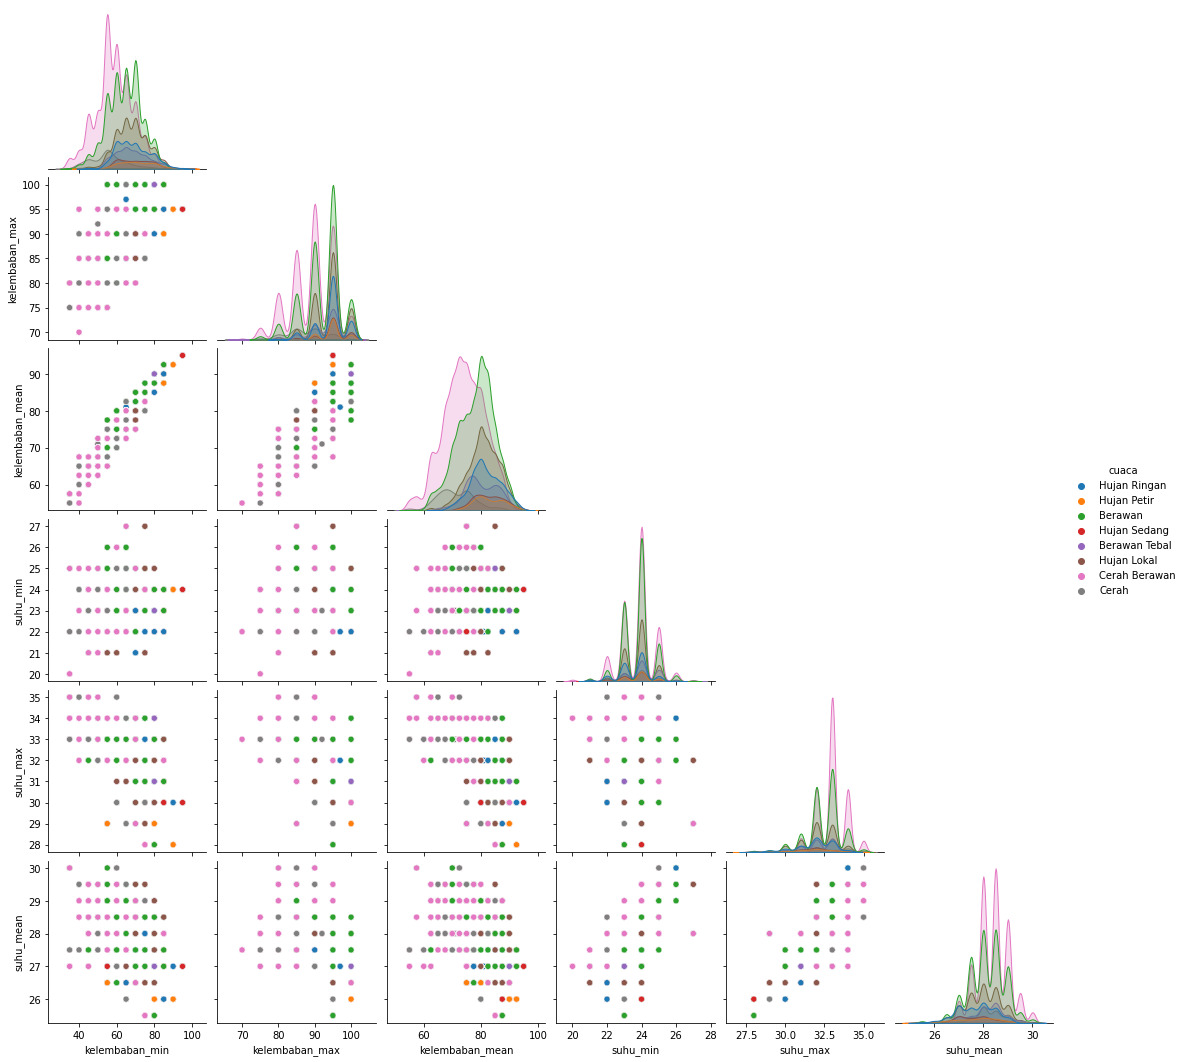

In [264]:
sns.pairplot(df, hue="cuaca", corner=True)

persebaran data cuaca Provinsi DKI Jakarta pada Tahun 2018

# Preprocessing

## Feature Selection

Pada tahapan ini feature selection menggunakan algoritma Random Forest<br>
Menggunakan rasio 80% data latih dan 20% data uji<br>
<br>
Tahapan pengujian hanya dilakukan untuk kolom waktu dan wilayah<br>
Karena menurut beberapa jurnal, cuaca dipengaruhi oleh kelembaban dan suhu<br>
Sehingga kolom kelembaban dan suhu tetap digunakan
<br><br>
Tahapan ini memiliki 4 kondisi, yaitu:
  - menguji kolom waktu dan wilayah
  - menguji kolom waktu
  - menguji kolom wilayah
  - menguji tanpa kolom waktu dan wilayah


### Membuang Kolom yang tidak memengaruhi hasil akurasi
#### <b>Menggunakan metode Wrapper dengan Backward Elimination</b>
Menggunakan algoritma Random Forest sebagai contoh model yang digunakan<br>
Serta menggunakan data df_encode yang sudah dilakukan tahapan Encoding secara manual

In [265]:
df.drop(columns=["tanggal"], inplace=True)
df_encode.drop(columns=["tanggal"], inplace=True)

Membuang kolom tanggal karena tidak diperlukan dalam proses<br>
Menganalisis dan memproses data cuaca Provinsi DKI Jakarta tahun 2018

In [266]:
hasil_model = pd.DataFrame(columns=['model', 'akurasi'])

#### Model 1 [Waktu, Wilayah]

In [267]:
df_selection = df_encode.copy()

X = df_selection.drop(columns=['cuaca'])
y = df_selection[['cuaca']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

model = RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

hasil_model = hasil_model.append({'model': 'model[Waktu, Wilayah]',
                                  'akurasi': score}, ignore_index=True)
hasil_model.head()

C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/834520353.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/834520353.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'model[Waktu, Wilayah]',


,model,akurasi
0,"model[Waktu, Wilayah]",0.466939


#### Model 2 [Waktu]

In [268]:
kolom = df_encode.columns[df_encode.columns.str.contains('wilayah', case=False)]
kolom.tolist() + ['cuaca']

['wilayah_Jakarta Barat',
 'wilayah_Jakarta Pusat',
 'wilayah_Jakarta Selatan',
 'wilayah_Jakarta Timur',
 'wilayah_Jakarta Utara',
 'wilayah_Kepulauan Seribu',
 'cuaca']

In [269]:
df_selection = df_encode.copy()

X = df_selection.drop(columns=kolom.tolist() + ['cuaca'])
y = df_selection[['cuaca']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

model = RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

hasil_model = hasil_model.append({'model': 'model[Waktu]',
                                  'akurasi': score}, ignore_index=True)
hasil_model.head()

C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/1736542630.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/1736542630.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'model[Waktu]',


,model,akurasi
0,"model[Waktu, Wilayah]",0.466939
1,model[Waktu],0.534083


#### Model 3 [Wilayah]

In [270]:
kolom = df_encode.columns[df_encode.columns.str.contains('waktu', case=False)]
kolom.tolist() + ['cuaca']

['waktu_Dini Hari', 'waktu_Malam', 'waktu_Pagi', 'waktu_Siang', 'cuaca']

In [271]:
df_selection = df_encode.copy()

X = df_selection.drop(columns=kolom.tolist() + ['cuaca'])
y = df_selection[['cuaca']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

model = RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

hasil_model = hasil_model.append({'model': 'model[Wilayah]',
                                  'akurasi': score}, ignore_index=True)
hasil_model.head()

C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/483045365.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/483045365.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'model[Wilayah]',


,model,akurasi
0,"model[Waktu, Wilayah]",0.466939
1,model[Waktu],0.534083
2,model[Wilayah],0.397069


#### Model 4 Tanpa [Waktu, Wilayah]

In [272]:
kolom = df_encode.columns[df_encode.columns.str.contains('waktu|wilayah', case=False)]
kolom.tolist() + ['cuaca']

['wilayah_Jakarta Barat',
 'wilayah_Jakarta Pusat',
 'wilayah_Jakarta Selatan',
 'wilayah_Jakarta Timur',
 'wilayah_Jakarta Utara',
 'wilayah_Kepulauan Seribu',
 'waktu_Dini Hari',
 'waktu_Malam',
 'waktu_Pagi',
 'waktu_Siang',
 'cuaca']

In [273]:
df_selection = df_encode.copy()

X = df_selection.drop(columns=kolom.tolist() + ['cuaca'])
y = df_selection[['cuaca']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

model = RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

hasil_model = hasil_model.append({'model': 'model tanpa[Waktu, Wilayah]',
                                  'akurasi': score}, ignore_index=True)
hasil_model.head()

C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/882495380.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/882495380.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'model tanpa[Waktu, Wilayah]',


,model,akurasi
0,"model[Waktu, Wilayah]",0.466939
1,model[Waktu],0.534083
2,model[Wilayah],0.397069
3,"model tanpa[Waktu, Wilayah]",0.445467


Berdasarkan hasil pemodelan tersebut, diputuskan untuk membuang kolom wilayah<br>
Karena tidak memengaruhi hasil akurasi menjadi lebih baik

## Simpan Data
Karena tahapan praproses data sudah selesai, data diduplikasi pada DataFrame yang baru dan<br>
Data juga disimpan pada file CSV yang baru agar data dapat digunakan kembali tanpa harus mengulang tahapan praproses data

In [274]:
df.to_csv(path_or_buf='data/clean_data.csv', index=False)

Menyimpan data dengan format CSV<br>
Dengan nama **clean_data.csv**

# Pemodelan

### Columns Transformer

In [275]:
df.dtypes

wilayah             object
waktu               object
cuaca               object
kelembaban_min       int32
kelembaban_max       int32
kelembaban_mean    float64
suhu_min             int32
suhu_max             int32
suhu_mean          float64
dtype: object

In [276]:
kategorik = df.select_dtypes(include=['object']).drop(['cuaca', 'wilayah'], axis=1).columns
numerik = df.select_dtypes(exclude=['object']).columns

columntransform = ColumnTransformer([
    ('categoric', OneHotEncoder(dtype=int, handle_unknown='ignore'), kategorik),
    ('numerik', StandardScaler(), numerik),
], remainder='passthrough')

### Pembagian Data

In [277]:
df.isnull().sum()

wilayah            0
waktu              0
cuaca              0
kelembaban_min     0
kelembaban_max     0
kelembaban_mean    0
suhu_min           0
suhu_max           0
suhu_mean          0
dtype: int64

In [278]:
df_model = df.copy()

X = df_model.drop(columns=["cuaca", "wilayah"])
y = df_model[["cuaca"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11733, 7), (2934, 7), (11733, 1), (2934, 1))

Membagi data berdasarkan data latih dan data uji<br>Dengan perbandingan data uji sebesar 20% dan data latih sebesar 80% dari total data dengan pembagian secara stratify terhadap kolom cuaca<br>
<br>
Membagi data menjadi fitur dan target, dimana variable y merupakan target yaitu kolom cuaca<br>
Sedangkan variable x merupakan sisa kolom selain kolom cuaca

# Fit Data

In [279]:
hasil_model = pd.DataFrame(columns=['model', 'akurasi testing', 'akurasi training'])

## Random Forest

#### Tanpa Resampling Data

In [280]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import AllKNN

In [281]:
fitur = X_train.columns
fitur

Index(['waktu', 'kelembaban_min', 'kelembaban_max', 'kelembaban_mean',
       'suhu_min', 'suhu_max', 'suhu_mean'],
      dtype='object')

In [282]:
model = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('classifier', RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=500))
])

model.fit(X_train, y_train)
score_test = model.score(X_test, y_test)
score_train = model.score(X_train, y_train)

hasil_model = hasil_model.append({'model': 'Model RF', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

d:\Python\lib\site-packages\imblearn\pipeline.py:272: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)


C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/3371758979.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model RF', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.534083,0.588341


#### Menggunakan Oversampling SMOTE

In [283]:
model = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('resampling', SMOTE(random_state=42, n_jobs=-1)),
    ('classifier', RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=500))
])

model.fit(X_train, y_train)
score_test = model.score(X_test, y_test)
score_train = model.score(X_train, y_train)

hasil_model = hasil_model.append({'model': 'Model RF, Oversampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

d:\Python\lib\site-packages\imblearn\pipeline.py:272: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/2943372816.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model RF, Oversampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.534083,0.588341
1,"Model RF, Oversampling",0.459782,0.522373


#### Menggunakan Undersampling AllKNN

In [284]:
model = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('resampling', AllKNN(n_jobs=-1)),
    ('classifier', RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=500))
])

model.fit(X_train, y_train)
score_test = model.score(X_test, y_test)
score_train = model.score(X_train, y_train)

hasil_model = hasil_model.append({'model': 'Model RF, Undersampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

d:\Python\lib\site-packages\imblearn\pipeline.py:272: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/3136308480.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model RF, Undersampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.534083,0.588341
1,"Model RF, Oversampling",0.459782,0.522373
2,"Model RF, Undersampling",0.447853,0.487599


## Extreme Gradient Boosting (XGBoost)

In [285]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [286]:
df['cuaca'].value_counts()

Cerah Berawan    5178
Berawan          4065
Hujan Lokal      1933
Hujan Ringan     1183
Berawan Tebal     898
Cerah             637
Hujan Sedang      425
Hujan Petir       348
Name: cuaca, dtype: int64

In [287]:
df_xgb = df.copy()

kategori_cuaca = sorted(df['cuaca'].unique())

# Membuat dictionary mapping
print(f'Kategori Cuaca :\n{kategori_cuaca}\n')
mapping = {kategori_cuaca[i]: i for i in range(len(kategori_cuaca))}

# Melakukan mapping data menggunakan fungsi map()
df_xgb['cuaca'] = df['cuaca'].map(mapping)

print(f"Kategori Cuaca Setelah Diperbaiki :\n{sorted(df_xgb['cuaca'].unique())}\n")
df_xgb['cuaca'].value_counts()

Kategori Cuaca :
['Berawan', 'Berawan Tebal', 'Cerah', 'Cerah Berawan', 'Hujan Lokal', 'Hujan Petir', 'Hujan Ringan', 'Hujan Sedang']

Kategori Cuaca Setelah Diperbaiki :
[0, 1, 2, 3, 4, 5, 6, 7]



3    5178
0    4065
4    1933
6    1183
1     898
2     637
7     425
5     348
Name: cuaca, dtype: int64

In [288]:
X_xgb = df_model.drop(columns=["cuaca", "wilayah"])
y_xgb = df_xgb['cuaca']

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, stratify=y, random_state=42, shuffle=True)

#### Tanpa Resampling Data

In [289]:
model_final = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('classifier', XGBClassifier(n_jobs=-1, random_state=42, n_estimators=500, objective='multi:softmax', num_class=len(kategori_cuaca)))
])

model_final.fit(X_train_xgb, y_train_xgb)
score_test = model_final.score(X_test_xgb, y_test_xgb)
score_train = model_final.score(X_train_xgb, y_train_xgb)

hasil_model = hasil_model.append({'model': 'Model XGBoost', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

d:\Python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:14:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/3746465479.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model XGBoost', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.534083,0.588341
1,"Model RF, Oversampling",0.459782,0.522373
2,"Model RF, Undersampling",0.447853,0.487599
3,Model XGBoost,0.539536,0.587574


#### Menggunakan Oversampling SMOTE

In [290]:
model_smote = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('resampling', SMOTE(random_state=42, n_jobs=-1)),
    ('classifier', XGBClassifier(n_jobs=-1, random_state=42, n_estimators=500, objective='multi:softmax', num_class=len(kategori_cuaca)))
])

model_smote.fit(X_train_xgb, y_train_xgb)
score_test = model_smote.score(X_test_xgb, y_test_xgb)
score_train = model_smote.score(X_train_xgb, y_train_xgb)

hasil_model = hasil_model.append({'model': 'Model XGBoost, Oversampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

d:\Python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/3521194602.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model XGBoost, Oversampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.534083,0.588341
1,"Model RF, Oversampling",0.459782,0.522373
2,"Model RF, Undersampling",0.447853,0.487599
3,Model XGBoost,0.539536,0.587574
4,"Model XGBoost, Oversampling",0.467962,0.522969


#### Menggunakan Undersampling AllKNN

In [291]:
model_allknn = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('resampling', AllKNN(n_jobs=-1)),
    ('classifier', XGBClassifier(n_jobs=-1, random_state=42, n_estimators=500, objective='multi:softmax', num_class=len(kategori_cuaca)))
])

model_allknn.fit(X_train_xgb, y_train_xgb)
score_test = model_allknn.score(X_test_xgb, y_test_xgb)
score_train = model_allknn.score(X_train_xgb, y_train_xgb)

hasil_model = hasil_model.append({'model': 'Model XGBoost, Undersampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

d:\Python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:15:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/1247069951.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model XGBoost, Undersampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.534083,0.588341
1,"Model RF, Oversampling",0.459782,0.522373
2,"Model RF, Undersampling",0.447853,0.487599
3,Model XGBoost,0.539536,0.587574
4,"Model XGBoost, Oversampling",0.467962,0.522969
5,"Model XGBoost, Undersampling",0.447853,0.487599


## Extra Trees

In [292]:
from sklearn.ensemble import ExtraTreesClassifier

#### Tanpa Resampling Data

In [293]:
model = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('classifier', ExtraTreesClassifier(n_jobs=-1, random_state=42, n_estimators=500))
])

model.fit(X_train, y_train)
score_test = model.score(X_test, y_test)
score_train = model.score(X_train, y_train)

hasil_model = hasil_model.append({'model': 'Model XTrees', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

d:\Python\lib\site-packages\imblearn\pipeline.py:272: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/3930268801.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model XTrees', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.534083,0.588341
1,"Model RF, Oversampling",0.459782,0.522373
2,"Model RF, Undersampling",0.447853,0.487599
3,Model XGBoost,0.539536,0.587574
4,"Model XGBoost, Oversampling",0.467962,0.522969
5,"Model XGBoost, Undersampling",0.447853,0.487599
6,Model XTrees,0.533742,0.588341


#### Menggunakan Oversampling SMOTE

In [294]:
model = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('resampling', SMOTE(random_state=42, n_jobs=-1)),
    ('classifier', ExtraTreesClassifier(n_jobs=-1, random_state=42, n_estimators=500))
])

model.fit(X_train, y_train)
score_test = model.score(X_test, y_test)
score_train = model.score(X_train, y_train)

hasil_model = hasil_model.append({'model': 'Model XTrees, Oversampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

d:\Python\lib\site-packages\imblearn\pipeline.py:272: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/3056615535.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model XTrees, Oversampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.534083,0.588341
1,"Model RF, Oversampling",0.459782,0.522373
2,"Model RF, Undersampling",0.447853,0.487599
3,Model XGBoost,0.539536,0.587574
4,"Model XGBoost, Oversampling",0.467962,0.522969
5,"Model XGBoost, Undersampling",0.447853,0.487599
6,Model XTrees,0.533742,0.588341
7,"Model XTrees, Oversampling",0.457737,0.521520


#### Menggunakan Undersampling AllKNN

In [295]:
model = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('resampling', AllKNN(n_jobs=-1)),
    ('classifier', ExtraTreesClassifier(n_jobs=-1, random_state=42, n_estimators=500))
])

model.fit(X_train, y_train)
score_test = model.score(X_test, y_test)
score_train = model.score(X_train, y_train)

hasil_model = hasil_model.append({'model': 'Model XTrees, Undersampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

d:\Python\lib\site-packages\imblearn\pipeline.py:272: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/2929293770.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model XTrees, Undersampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.534083,0.588341
1,"Model RF, Oversampling",0.459782,0.522373
2,"Model RF, Undersampling",0.447853,0.487599
3,Model XGBoost,0.539536,0.587574
4,"Model XGBoost, Oversampling",0.467962,0.522969
5,"Model XGBoost, Undersampling",0.447853,0.487599
6,Model XTrees,0.533742,0.588341
7,"Model XTrees, Oversampling",0.457737,0.521520
8,"Model XTrees, Undersampling",0.447512,0.487599


## Categorical Boosting

In [296]:
from catboost import CatBoostClassifier

#### Tanpa Resampling Data

In [297]:
model = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('classifier', CatBoostClassifier(random_state=42, verbose=False))
])

model.fit(X_train, y_train)
score_test = model.score(X_test, y_test)
score_train = model.score(X_train, y_train)

hasil_model = hasil_model.append({'model': 'Model Catboost', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/517395912.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model Catboost', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.534083,0.588341
1,"Model RF, Oversampling",0.459782,0.522373
2,"Model RF, Undersampling",0.447853,0.487599
3,Model XGBoost,0.539536,0.587574
4,"Model XGBoost, Oversampling",0.467962,0.522969
5,"Model XGBoost, Undersampling",0.447853,0.487599
6,Model XTrees,0.533742,0.588341
7,"Model XTrees, Oversampling",0.457737,0.521520
8,"Model XTrees, Undersampling",0.447512,0.487599
9,Model Catboost,0.528971,0.578454


#### Menggunakan Oversampling SMOTE

In [298]:
model = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('resampling', SMOTE(random_state=42, n_jobs=-1)),
    ('classifier', CatBoostClassifier(random_state=42, verbose=False))
])

model.fit(X_train, y_train)
score_test = model.score(X_test, y_test)
score_train = model.score(X_train, y_train)

hasil_model = hasil_model.append({'model': 'Model Catboost, Oversampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/3131460374.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model Catboost, Oversampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.534083,0.588341
1,"Model RF, Oversampling",0.459782,0.522373
2,"Model RF, Undersampling",0.447853,0.487599
3,Model XGBoost,0.539536,0.587574
4,"Model XGBoost, Oversampling",0.467962,0.522969
5,"Model XGBoost, Undersampling",0.447853,0.487599
6,Model XTrees,0.533742,0.588341
7,"Model XTrees, Oversampling",0.457737,0.521520
8,"Model XTrees, Undersampling",0.447512,0.487599
9,Model Catboost,0.528971,0.578454


#### Menggunakan Undersampling AllKNN

In [299]:
model = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('resampling', AllKNN(n_jobs=-1)),
    ('classifier', CatBoostClassifier(random_state=42, verbose=False))
])

model.fit(X_train, y_train)
score_test = model.score(X_test, y_test)
score_train = model.score(X_train, y_train)

hasil_model = hasil_model.append({'model': 'Model Catboost, Undersampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_11576/4151877589.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model Catboost, Undersampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.534083,0.588341
1,"Model RF, Oversampling",0.459782,0.522373
2,"Model RF, Undersampling",0.447853,0.487599
3,Model XGBoost,0.539536,0.587574
4,"Model XGBoost, Oversampling",0.467962,0.522969
5,"Model XGBoost, Undersampling",0.447853,0.487599
6,Model XTrees,0.533742,0.588341
7,"Model XTrees, Oversampling",0.457737,0.521520
8,"Model XTrees, Undersampling",0.447512,0.487599
9,Model Catboost,0.528971,0.578454


# Kesimpulan

In [300]:
hasil_model.sort_values(by='akurasi testing', ascending=False)

,model,akurasi testing,akurasi training
3,Model XGBoost,0.539536,0.587574
0,Model RF,0.534083,0.588341
6,Model XTrees,0.533742,0.588341
9,Model Catboost,0.528971,0.578454
4,"Model XGBoost, Oversampling",0.467962,0.522969
1,"Model RF, Oversampling",0.459782,0.522373
7,"Model XTrees, Oversampling",0.457737,0.521520
10,"Model Catboost, Oversampling",0.457055,0.510867
11,"Model Catboost, Undersampling",0.453306,0.500554
2,"Model RF, Undersampling",0.447853,0.487599


In [301]:
hasil_model[hasil_model['model'].str.contains('oversampling', case=False)].sort_values(by='akurasi testing', ascending=False)

,model,akurasi testing,akurasi training
4,"Model XGBoost, Oversampling",0.467962,0.522969
1,"Model RF, Oversampling",0.459782,0.522373
7,"Model XTrees, Oversampling",0.457737,0.521520
10,"Model Catboost, Oversampling",0.457055,0.510867


In [302]:
hasil_model[hasil_model['model'].str.contains('undersampling', case=False)].sort_values(by='akurasi testing', ascending=False)

,model,akurasi testing,akurasi training
11,"Model Catboost, Undersampling",0.453306,0.500554
2,"Model RF, Undersampling",0.447853,0.487599
5,"Model XGBoost, Undersampling",0.447853,0.487599
8,"Model XTrees, Undersampling",0.447512,0.487599


In [303]:
hasil_model[~hasil_model['model'].str.contains('undersampling|oversampling', case=False)].sort_values(by='akurasi testing', ascending=False)

,model,akurasi testing,akurasi training
3,Model XGBoost,0.539536,0.587574
0,Model RF,0.534083,0.588341
6,Model XTrees,0.533742,0.588341
9,Model Catboost,0.528971,0.578454


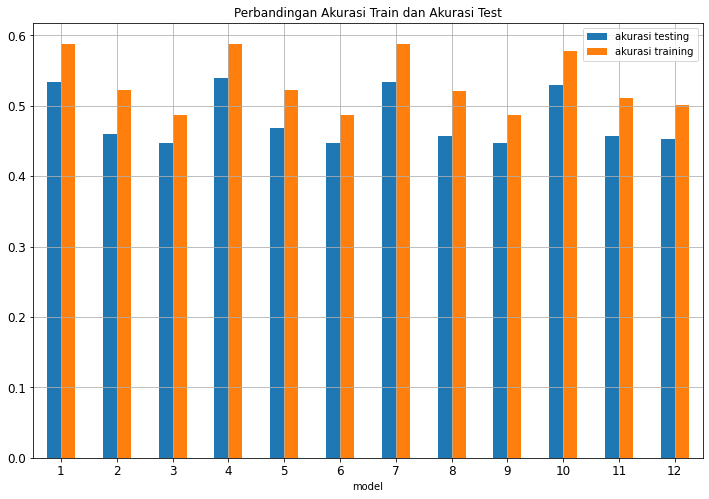

In [304]:
hasil_model.plot(kind='bar', figsize=(12, 8), x='model', y=['akurasi testing', 'akurasi training'], rot=0, fontsize=12, grid=True, title='Perbandingan Akurasi Train dan Akurasi Test')
plt.xticks(ticks=range(0, len(hasil_model['model'])), labels=range(1, len(hasil_model['model']) + 1));

Keterangan :<br>
1   : Random Forest<br>
2   : Random Forest with Oversampling<br>
3   : Random Forest with Undersampling<br>
4   : Extreme Gradient Boosting<br>
5   : Extreme Gradient Boosting with Oversampling<br>
6   : Extreme Gradient Boosting with Undersampling<br>
7   : Extra Trees<br>
8   : Extra Trees with Oversampling<br>
9   : Extra Trees with Undersampling<br>
10 : Categorical Gradient Boosting<br>
11 : Categorical Gradient Boosting with Oversampling<br>
12 : Categorical Gradient Boosting with Undersampling

Berdasarkan hasil akurasi pada algoritma Random Forest, XGBoost, Extra Trees dan Catboost didapatkan bahwa: <br>
- Akurasi tertinggi didapatkan oleh algoritma XGBoost tanpa Resampling Data yaitu 53,95% untuk akurasi testing dan 58,76% untuk akurasi training

- Berdasarkan ke-4 algoritma yang digunakan, algoritma XGBoost menghasilkan hasil akurasi tertinggi dari ke-3 algoritma lainnya

- Hasil akurasi Model tanpa Resampling Data menghasilkan nilai akurasi yang lebih tinggi dari pada menggunakan oversampling dengan SMOTE atau menggunakan undersampling dengan AllKNN

- Metode oversampling dan undersampling membuat data menjadi lebih seimbang dan tidak overfitting, Namun tidak meningkatkan hasil akurasi menjadi lebih baik

In [305]:
X_train.columns

Index(['waktu', 'kelembaban_min', 'kelembaban_max', 'kelembaban_mean',
       'suhu_min', 'suhu_max', 'suhu_mean'],
      dtype='object')

In [306]:
pd.DataFrame(model_final[0].fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.162852,0.623182,0.359852,0.240097,0.438949,0.486449
1,0.0,0.0,0.0,1.0,0.162852,1.510709,0.708145,-1.965899,-1.286696,-2.192190
2,0.0,0.0,1.0,0.0,0.162852,0.623182,0.359852,0.240097,0.438949,0.486449
3,0.0,0.0,1.0,0.0,-0.329100,-1.151871,-0.685027,1.343095,2.164594,2.495429
4,0.0,1.0,0.0,0.0,-0.329100,1.510709,0.359852,-0.862901,0.438949,-0.183210
...,...,...,...,...,...,...,...,...,...,...
11728,0.0,0.0,0.0,1.0,-0.821051,-0.264344,-0.685027,0.240097,0.438949,0.486449
11729,0.0,0.0,1.0,0.0,2.130656,0.623182,1.753024,0.240097,-2.149519,-1.522530
11730,0.0,1.0,0.0,0.0,1.146754,0.623182,1.056438,1.343095,-1.286696,-0.183210
11731,0.0,0.0,0.0,1.0,-0.821051,-0.264344,-0.685027,-0.862901,1.301772,0.486449


In [307]:
X_train

,waktu,kelembaban_min,kelembaban_max,kelembaban_mean,suhu_min,suhu_max,suhu_mean
9828,Malam,65,95,80.0,24,33,28.5
405,Siang,65,100,82.5,22,31,26.5
5989,Pagi,65,95,80.0,24,33,28.5
13448,Pagi,60,85,72.5,25,35,30.0
7944,Malam,60,100,80.0,23,33,28.0
...,...,...,...,...,...,...,...
4986,Siang,55,90,72.5,24,33,28.5
782,Pagi,85,95,90.0,24,30,27.0
5808,Malam,75,95,85.0,25,31,28.0
10130,Siang,55,90,72.5,23,34,28.5


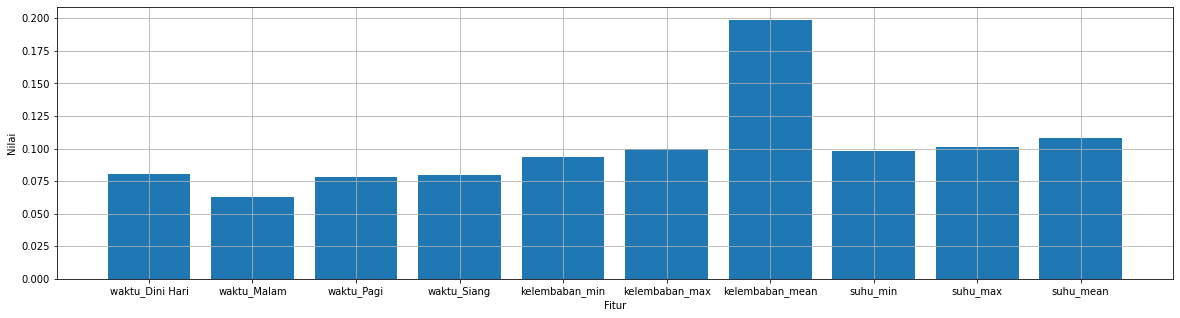

In [308]:
feature_importance = model_final[-1].feature_importances_

# Visualisasi feature importance
plt.figure(figsize=(20, 5))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), ['waktu_Dini Hari','waktu_Malam', 'waktu_Pagi', 'waktu_Siang', 'kelembaban_min', 'kelembaban_max', 'kelembaban_mean', 'suhu_min', 'suhu_max', 'suhu_mean'])
plt.xlabel('Fitur')
plt.ylabel('Nilai')
plt.grid(True)
plt.show()

# Manual Prediksi

In [ ]:
df.head()

,wilayah,waktu,cuaca,kelembaban_min,kelembaban_max,kelembaban_mean,suhu_min,suhu_max,suhu_mean
0,Jakarta Barat,Malam,Hujan Ringan,65,95,80.0,22,31,26.5
1,Jakarta Barat,Pagi,Hujan Ringan,65,95,80.0,22,31,26.5
2,Jakarta Barat,Siang,Hujan Petir,65,95,80.0,22,31,26.5
3,Jakarta Pusat,Malam,Hujan Ringan,65,95,80.0,22,31,26.5
4,Jakarta Pusat,Pagi,Hujan Ringan,65,95,80.0,22,31,26.5


In [ ]:
prediksi = {
    'wilayah': ['Jakarta Barat'],
    'waktu': ['Siang'],
    'kelembaban_min': [65],
    'kelembaban_max': [95],
    'kelembaban_mean': [80.0],
    'suhu_min': [22],
    'suhu_max': [31],
    'suhu_mean': [26.5],
    'waktu': ['Siang']
}

In [ ]:
def manual_testing(cuaca):
    df_pred = pd.DataFrame(cuaca)

    pred_1 = model_final.predict(df_pred)
    pred_2 = model_smote.predict(df_pred)
    pred_3 = model_allknn.predict(df_pred)

    return print("XGBoost Prediction: {} \nXGBoost Oversampling Prediction: {} \nXGBoost UnderSampling Prediction: {}".format((pred_1[0]), format(pred_2[0]), format(pred_3[0])))

print(f'Kategori Cuaca :\n{kategori_cuaca}\n')
print(f"Kategori Cuaca Encoding :\n{sorted(df_xgb['cuaca'].unique())}\n\n")
print(f"Kategori Cuaca Aktual : {df['cuaca'].iloc[2]}")
manual_testing(prediksi)

Kategori Cuaca :
['Berawan', 'Berawan Tebal', 'Cerah', 'Cerah Berawan', 'Hujan Lokal', 'Hujan Petir', 'Hujan Ringan', 'Hujan Sedang']

Kategori Cuaca Encoding :
[0, 1, 2, 3, 4, 5, 6, 7]


Kategori Cuaca Aktual : Hujan Petir
XGBoost Prediction: 5 
XGBoost Oversampling Prediction: 5 
XGBoost UnderSampling Prediction: 5
